Nim examples, and notes on this kernel
======================================

Hello World
-----------

In [ ]:
echo "hello world!"

Hint: used config file 'C:\Dev\nim-git\config\nim.cfg' [Conf]
Hint: used config file 'C:\Dev\nim-git\config\config.nims' [Conf]
......................CC: codecells.nim
Link: codecells.nim
Hint: 42917 lines; 1.173s; 60.715MiB peakmem; Debug build; proj: C:\Users\stisa\.jupyternim\codeserver.nim; out: C:\Users\stisa\.jupyternim\nimcodeserver.exe [SuccessX]


[codeserver.nim:17] CODESERVERGOTACOMMAND #runNimCodeServer
[codeserver.nim:19] true
[codeserver.nim:25] #### RELOAD PERFORMED ####
hello world!


Notes on sharing globals
--------------------------------------------
Lets define a var `x`.

In [ ]:
var x = 12

Hint: used config file 'C:\Dev\nim-git\config\nim.cfg' [Conf]
Hint: used config file 'C:\Dev\nim-git\config\config.nims' [Conf]
......................
C:\Users\stisa\.jupyternim\codecells.nim(21, 7) Hint: 'x' is declared but not used [XDeclaredButNotUsed]
CC: stdlib_io.nim
CC: stdlib_system.nim
CC: codecells.nim
Link: stdlib_io.nim
Link: stdlib_system.nim
Link: codecells.nim
Hint: 42918 lines; 1.645s; 60.715MiB peakmem; Debug build; proj: C:\Users\stisa\.jupyternim\codeserver.nim; out: C:\Users\stisa\.jupyternim\nimcodeserver.exe [SuccessX]


[codeserver.nim:17] CODESERVERGOTACOMMAND #runNimCodeServer
[codeserver.nim:19] true
[codeserver.nim:25] #### RELOAD PERFORMED ####


In [ ]:
echo x

Hint: used config file 'C:\Dev\nim-git\config\nim.cfg' [Conf]
Hint: used config file 'C:\Dev\nim-git\config\config.nims' [Conf]
......................CC: codecells.nim
Link: codecells.nim
Hint: 42919 lines; 1.247s; 60.742MiB peakmem; Debug build; proj: C:\Users\stisa\.jupyternim\codeserver.nim; out: C:\Users\stisa\.jupyternim\nimcodeserver.exe [SuccessX]


[codeserver.nim:17] CODESERVERGOTACOMMAND #runNimCodeServer
[codeserver.nim:19] true
[codeserver.nim:25] #### RELOAD PERFORMED ####
12


Ok, the value is maintained between blocks thanks to hotcodereloading.  
Lets update it:

In [ ]:
x = 123*x
echo x

Hint: used config file 'C:\Dev\nim-git\config\nim.cfg' [Conf]
Hint: used config file 'C:\Dev\nim-git\config\config.nims' [Conf]
......................CC: codecells.nim
Link: codecells.nim
Hint: 42921 lines; 1.146s; 49MiB peakmem; Release build; proj: C:\Users\stisa\.jupyternim\codeserver.nim; out: C:\Users\stisa\.jupyternim\nimcodeserver.exe [SuccessX]


1476


Ok, we got 1476, it's correct you can check it.  
What if we changed the value at the assignment site? Lets try.

In [ ]:
var x = 123

Hint: used config file 'C:\Dev\nim-git\config\nim.cfg' [Conf]
Hint: used config file 'C:\Dev\nim-git\config\config.nims' [Conf]
......................
C:\Users\stisa\.jupyternim\codecells.nim(20, 7) Hint: 'x' is declared but not used [XDeclaredButNotUsed]
CC: codecells.nim
Link: codecells.nim
Hint: 42917 lines; 1.253s; 60.742MiB peakmem; Debug build; proj: C:\Users\stisa\.jupyternim\codeserver.nim; out: C:\Users\stisa\.jupyternim\nimcodeserver.exe [SuccessX]


[codeserver.nim:17] CODESERVERGOTACOMMAND #runNimCodeServer
[codeserver.nim:19] true
[codeserver.nim:25] #### RELOAD PERFORMED ####


Ouch, redefinition error.  
This is due to how we write the temp file that holds the code we run.  
It *may* get fixed in the future, but for now I suggest just placing empty initialization in their own blocks.

In [ ]:
echo x

Hint: used config file 'C:\Dev\nim-git\config\nim.cfg' [Conf]
Hint: used config file 'C:\Dev\nim-git\config\config.nims' [Conf]
......................CC: codecells.nim
Link: codecells.nim
Hint: 42918 lines; 1.141s; 60.742MiB peakmem; Debug build; proj: C:\Users\stisa\.jupyternim\codeserver.nim; out: C:\Users\stisa\.jupyternim\nimcodeserver.exe [SuccessX]


[codeserver.nim:17] CODESERVERGOTACOMMAND #runNimCodeServer
[codeserver.nim:19] true
[codeserver.nim:25] #### RELOAD PERFORMED ####
123


Luckily, we can still continue with the previous value, so this would work

In [ ]:
x = 123
echo x

Hint: used config file 'C:\Dev\nim-git\config\nim.cfg' [Conf]
Hint: used config file 'C:\Dev\nim-git\config\config.nims' [Conf]
......................CC: codecells.nim
Link: codecells.nim
Hint: 42924 lines; 1.236s; 49MiB peakmem; Release build; proj: C:\Users\stisa\.jupyternim\codeserver.nim; out: C:\Users\stisa\.jupyternim\nimcodeserver.exe [SuccessX]


123


Import
------------
If the host system as the correct package installed, you can use `import` like normal.  
Files in the working directory of the notebook are not picked up, because the compilation happens in a temp folder.

In [ ]:
import math

Hint: used config file 'C:\Dev\nim-git\config\nim.cfg' [Conf]
Hint: used config file 'C:\Dev\nim-git\config\config.nims' [Conf]
......................
C:\Users\stisa\.jupyternim\codecells.nim(21, 10) Warning: imported and not used: 'math' [UnusedImport]
CC: stdlib_io.nim
CC: stdlib_system.nim
CC: codecells.nim
Link: stdlib_io.nim
Link: stdlib_system.nim
Link: codecells.nim
Hint: 42918 lines; 1.622s; 60.758MiB peakmem; Debug build; proj: C:\Users\stisa\.jupyternim\codeserver.nim; out: C:\Users\stisa\.jupyternim\nimcodeserver.exe [SuccessX]


[codeserver.nim:17] CODESERVERGOTACOMMAND #runNimCodeServer
[codeserver.nim:19] true
[codeserver.nim:25] #### RELOAD PERFORMED ####


In [ ]:
var y = 5.0

Hint: used config file 'C:\Dev\nim-git\config\nim.cfg' [Conf]
Hint: used config file 'C:\Dev\nim-git\config\config.nims' [Conf]
......................
C:\Users\stisa\.jupyternim\codecells.nim(22, 7) Hint: 'y' is declared but not used [XDeclaredButNotUsed]
C:\Users\stisa\.jupyternim\codecells.nim(20, 8) Warning: imported and not used: 'math' [UnusedImport]
CC: codecells.nim
Link: codecells.nim
Hint: 42919 lines; 1.198s; 60.742MiB peakmem; Debug build; proj: C:\Users\stisa\.jupyternim\codeserver.nim; out: C:\Users\stisa\.jupyternim\nimcodeserver.exe [SuccessX]


[codeserver.nim:17] CODESERVERGOTACOMMAND #runNimCodeServer
[codeserver.nim:19] true
[codeserver.nim:25] #### RELOAD PERFORMED ####


In [8]:
import sequtils
var s : seq[char] = toSeq("hello notebook!".items)
var z : seq[char] = toSeq("!koobeton olleh".items)
echo zip(s,z)

Loaded dynamic library: 'python35.dll'
@[(a: h, b: !), (a: e, b: k), (a: l, b: o), (a: l, b: o), (a: o, b: b), (a:  , b: e), (a: n, b: t), (a: o, b: o), (a: t, b: n), (a: e, b:  ), (a: b, b: o), (a: o, b: l), (a: o, b: l), (a: k, b: e), (a: !, b: h)]


In [ ]:
echo y.pow(2.0)

Hint: used config file 'C:\Dev\nim-git\config\nim.cfg' [Conf]
Hint: used config file 'C:\Dev\nim-git\config\config.nims' [Conf]
......................CC: stdlib_formatfloat.nim
CC: stdlib_system.nim
CC: codecells.nim
Link: stdlib_formatfloat.nim
Link: stdlib_system.nim
Link: codecells.nim
Hint: 42920 lines; 1.655s; 60.711MiB peakmem; Debug build; proj: C:\Users\stisa\.jupyternim\codeserver.nim; out: C:\Users\stisa\.jupyternim\nimcodeserver.exe [SuccessX]


Show the tempfile name
----------------------
Show tempfile name for this cell which happens to be the module name and therefor has a limited charset


In [9]:
template FILE: string = instantiationInfo().filename

echo "Module tempfile: '" & FILE() & "'"

Loaded dynamic library: 'python35.dll'
Module tempfile: 'block9.nim'


Misc examples
-------------

### Simple procs

In [10]:
proc square(x:int):int =
    result = x*x

echo square(5)

Loaded dynamic library: 'python35.dll'
25


### Json parsing

In [11]:
import json
 
var data = parseJson("""{ "foo": 1, "bar": [10, "apples"] }""")
echo data["foo"]
echo data["bar"]
 
var js = %[%{"name": %"John", "age": %30}, %{"name": %"Susan", "age": %31}]
echo js

Loaded dynamic library: 'python35.dll'
1
[10,"apples"]
[{"name":"John","age":30},{"name":"Susan","age":31}]


##

Plotting
-----------

A naive wrapper around a small subset of matplotlib is available.

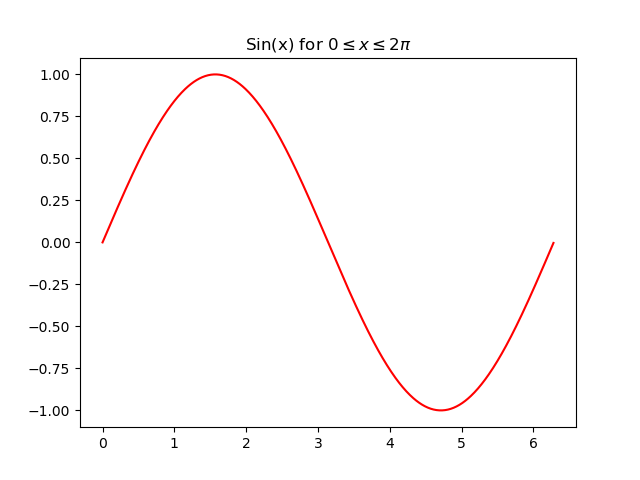

Loaded dynamic library: 'python35.dll'


In [2]:
#>inlineplot
import math,sequtils

iterator linsp*[T](fm,to,step:T):T =
    if fm<to:
      var res: T = T(fm)
      while res<=to:
        yield res
        res+=step
    elif fm>to:
      var res: T = T(fm)
      while res>=to:
        yield res
        res-=step
    else:
      yield fm
    

proc linspace* [T](fm,to,step:T):seq[T] = toSeq(linsp(fm, to, step)) # Result and step should be same type, not all 4


proc sin (x:openarray[float]):seq[float] =
  result = map(x) do (x:float)->float : 
    sin(x)

let xx = linspace(0.0,2*Pi,0.01)

show:
    plot(xx,sin(xx))
    title(r"Sin(x) for $0\leq x\leq 2\pi$" )

Basic histograms are also supported.

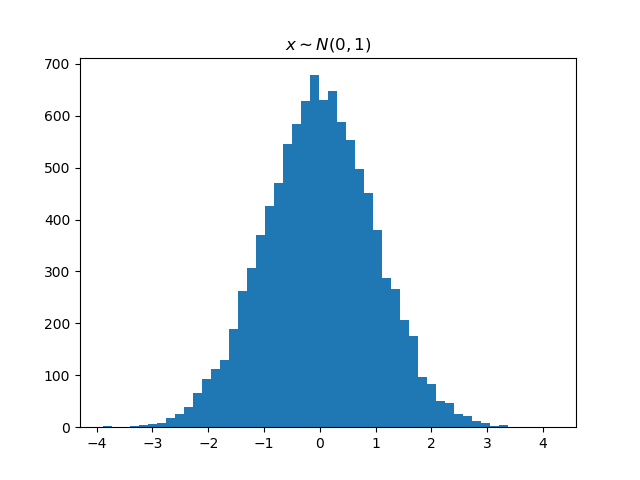

Loaded dynamic library: 'libpython3.6.dylib'


In [15]:
#>inlineplot
import math, random, sequtils

# simulate a standard normal deviate
proc normal(): float =
  var q, v, u, x, y = 100.0
  while (q > 0.27597 and (q > 0.27846 or v * v > -4 * ln(u) * u * u)):
    u = random(1.0)
    v = 1.7156 * (random(1.0) - 0.5)
    x = u - 0.449871
    y = abs(v) + 0.386595
    q = x * x + y * (0.19600 * y - 0.25472 * x)
  return v / u
  
let samples = newSeqWith(10000, normal())

show:
    hist(samples, bins=50)
    title(r"$x \sim N(0, 1)$" )